# Train a machine learning model and track with MLflow


In [1]:
# Azure storage access info for open dataset diabetes
blob_account_name = "azureopendatastorage"
blob_container_name = "mlsamples"
blob_relative_path = "diabetes"
blob_sas_token = r"" # Blank since container is Anonymous access
    
# Set Spark config to access  blob storage
wasbs_path = f"wasbs://%s@%s.blob.core.windows.net/%s" % (blob_container_name, blob_account_name, blob_relative_path)
spark.conf.set("fs.azure.sas.%s.%s.blob.core.windows.net" % (blob_container_name, blob_account_name), blob_sas_token)
print("Remote blob path: " + wasbs_path)
    
# Spark read parquet, note that it won't load any data yet by now
df = spark.read.parquet(wasbs_path)

StatementMeta(, 2971fcd4-7a70-4d21-82c0-1f75ddc59622, 3, Finished, Available, Finished)

Remote blob path: wasbs://mlsamples@azureopendatastorage.blob.core.windows.net/diabetes


In [2]:
display(df)

StatementMeta(, 2971fcd4-7a70-4d21-82c0-1f75ddc59622, 4, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, bf3dfb5a-09e3-45e3-b420-0ce7fc568af9)

In [3]:
import pandas as pd
df = df.toPandas()
df.head()

StatementMeta(, 2971fcd4-7a70-4d21-82c0-1f75ddc59622, 5, Finished, Available, Finished)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [4]:
from sklearn.model_selection import train_test_split
    
X, y = df[['AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6']].values, df['Y'].values
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

StatementMeta(, 2971fcd4-7a70-4d21-82c0-1f75ddc59622, 6, Finished, Available, Finished)

In [5]:
import mlflow
experiment_name = "experiment-diabetes"
mlflow.set_experiment(experiment_name)

StatementMeta(, 2971fcd4-7a70-4d21-82c0-1f75ddc59622, 7, Finished, Available, Finished)

2025/03/26 00:54:34 INFO mlflow.tracking.fluent: Experiment with name 'experiment-diabetes' does not exist. Creating a new experiment.


<Experiment: artifact_location='', creation_time=1742950482167, experiment_id='12799bd1-0883-40fb-9890-8a698aff178f', last_update_time=None, lifecycle_stage='active', name='experiment-diabetes', tags={}>

In [6]:
from sklearn.linear_model import LinearRegression
    
with mlflow.start_run():
   mlflow.autolog()
    
   model = LinearRegression()
   model.fit(X_train, y_train)
    
   mlflow.log_param("estimator", "LinearRegression")

StatementMeta(, 2971fcd4-7a70-4d21-82c0-1f75ddc59622, 8, Finished, Available, Finished)

2025/03/26 00:54:58 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/03/26 00:55:14 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


In [7]:
from sklearn.tree import DecisionTreeRegressor
    
with mlflow.start_run():
   mlflow.autolog()
    
   model = DecisionTreeRegressor(max_depth=5) 
   model.fit(X_train, y_train)
    
   mlflow.log_param("estimator", "DecisionTreeRegressor")

StatementMeta(, 2971fcd4-7a70-4d21-82c0-1f75ddc59622, 9, Finished, Available, Finished)

2025/03/26 00:55:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [8]:
import mlflow
experiments = mlflow.search_experiments()
for exp in experiments:
    print(exp.name)

StatementMeta(, 2971fcd4-7a70-4d21-82c0-1f75ddc59622, 10, Finished, Available, Finished)

experiment-diabetes


In [9]:
experiment_name = "experiment-diabetes"
exp = mlflow.get_experiment_by_name(experiment_name)
print(exp)

StatementMeta(, 2971fcd4-7a70-4d21-82c0-1f75ddc59622, 11, Finished, Available, Finished)

<Experiment: artifact_location='', creation_time=1742950482167, experiment_id='12799bd1-0883-40fb-9890-8a698aff178f', last_update_time=None, lifecycle_stage='active', name='experiment-diabetes', tags={}>


In [10]:
mlflow.search_runs(exp.experiment_id)

StatementMeta(, 2971fcd4-7a70-4d21-82c0-1f75ddc59622, 12, Finished, Available, Finished)

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.training_score,metrics.training_mean_absolute_error,metrics.training_r2_score,metrics.training_mean_squared_error,...,params.max_leaf_nodes,tags.synapseml.notebook.artifactId,tags.estimator_class,tags.mlflow.rootRunId,tags.mlflow.user,tags.mlflow.runName,tags.estimator_name,tags.synapseml.livy.id,tags.synapseml.user.name,tags.synapseml.user.id
0,f0e5399e-d6d3-4216-88d0-4e33663cf172,12799bd1-0883-40fb-9890-8a698aff178f,FINISHED,sds://onelakenorthcentralus.pbidedicated.windo...,2025-03-26 00:54:57.748000+00:00,2025-03-26 00:55:17.796000+00:00,0.553938,43.054973,0.553938,2804.143561,...,None,c2344b7a-f66a-4b09-b0a7-47df5caeeeec,sklearn.linear_model._base.LinearRegression,f0e5399e-d6d3-4216-88d0-4e33663cf172,4b3a56ea-6f42-450e-b7c3-fb2932c7ac32,willing_frame_rg1vvdk3,LinearRegression,2971fcd4-7a70-4d21-82c0-1f75ddc59622,Megha DharwadChandrashekar,8c75649a-4115-4136-8356-e7eaac6ce19a
1,63aeee24-285d-4318-9dab-c80f3be77840,12799bd1-0883-40fb-9890-8a698aff178f,FINISHED,sds://onelakenorthcentralus.pbidedicated.windo...,2025-03-26 00:55:30.009000+00:00,2025-03-26 00:55:34.163000+00:00,0.732149,31.483440,0.732149,1683.830915,...,None,c2344b7a-f66a-4b09-b0a7-47df5caeeeec,sklearn.tree._classes.DecisionTreeRegressor,63aeee24-285d-4318-9dab-c80f3be77840,4b3a56ea-6f42-450e-b7c3-fb2932c7ac32,strong_leg_sy7zwn66,DecisionTreeRegressor,2971fcd4-7a70-4d21-82c0-1f75ddc59622,Megha DharwadChandrashekar,8c75649a-4115-4136-8356-e7eaac6ce19a


In [11]:
mlflow.search_runs(exp.experiment_id, order_by=["start_time DESC"], max_results=2)

StatementMeta(, 2971fcd4-7a70-4d21-82c0-1f75ddc59622, 13, Finished, Available, Finished)

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.training_score,metrics.training_mean_absolute_error,metrics.training_r2_score,metrics.training_mean_squared_error,...,params.fit_intercept,tags.synapseml.notebook.artifactId,tags.estimator_class,tags.mlflow.rootRunId,tags.mlflow.user,tags.mlflow.runName,tags.estimator_name,tags.synapseml.livy.id,tags.synapseml.user.name,tags.synapseml.user.id
0,63aeee24-285d-4318-9dab-c80f3be77840,12799bd1-0883-40fb-9890-8a698aff178f,FINISHED,sds://onelakenorthcentralus.pbidedicated.windo...,2025-03-26 00:55:30.009000+00:00,2025-03-26 00:55:34.163000+00:00,0.732149,31.483440,0.732149,1683.830915,...,None,c2344b7a-f66a-4b09-b0a7-47df5caeeeec,sklearn.tree._classes.DecisionTreeRegressor,63aeee24-285d-4318-9dab-c80f3be77840,4b3a56ea-6f42-450e-b7c3-fb2932c7ac32,strong_leg_sy7zwn66,DecisionTreeRegressor,2971fcd4-7a70-4d21-82c0-1f75ddc59622,Megha DharwadChandrashekar,8c75649a-4115-4136-8356-e7eaac6ce19a
1,f0e5399e-d6d3-4216-88d0-4e33663cf172,12799bd1-0883-40fb-9890-8a698aff178f,FINISHED,sds://onelakenorthcentralus.pbidedicated.windo...,2025-03-26 00:54:57.748000+00:00,2025-03-26 00:55:17.796000+00:00,0.553938,43.054973,0.553938,2804.143561,...,True,c2344b7a-f66a-4b09-b0a7-47df5caeeeec,sklearn.linear_model._base.LinearRegression,f0e5399e-d6d3-4216-88d0-4e33663cf172,4b3a56ea-6f42-450e-b7c3-fb2932c7ac32,willing_frame_rg1vvdk3,LinearRegression,2971fcd4-7a70-4d21-82c0-1f75ddc59622,Megha DharwadChandrashekar,8c75649a-4115-4136-8356-e7eaac6ce19a


StatementMeta(, 2971fcd4-7a70-4d21-82c0-1f75ddc59622, 14, Finished, Available, Finished)

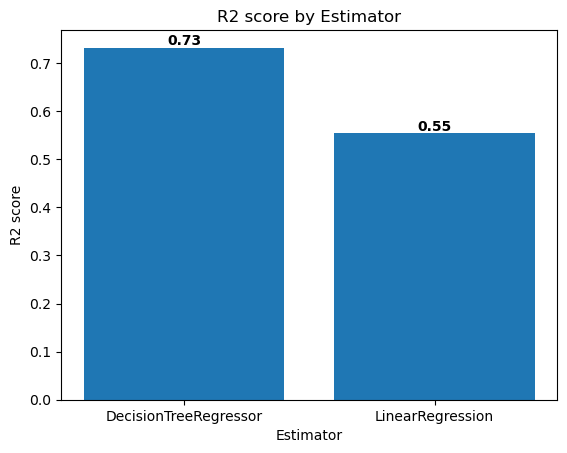

In [12]:
import matplotlib.pyplot as plt
   
df_results = mlflow.search_runs(exp.experiment_id, order_by=["start_time DESC"], max_results=2)[["metrics.training_r2_score", "params.estimator"]]
   
fig, ax = plt.subplots()
ax.bar(df_results["params.estimator"], df_results["metrics.training_r2_score"])
ax.set_xlabel("Estimator")
ax.set_ylabel("R2 score")
ax.set_title("R2 score by Estimator")
for i, v in enumerate(df_results["metrics.training_r2_score"]):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontweight='bold')
plt.show()